Version 2023.12.21  -    A. Lundervold / A. S. Lundervold / B. Bjørsvik

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219/blob/main/Lab0-ML/Lab0-01-simple-examples.ipynb)

# A first example of machine learning

Welcome to the first step on your hands-on journey into machine learning! In this Jupyter Notebook, we'll use machine learning to study some standard benchmark data sets. 

You can download the notebook from the course GitHub repo: https://github.com/MMIV-ML/ELMED219 (https://github.com/MMIV-ML/BMED365)

> You'll find some cells marked "Your turn!" below. These are meant to help you experiment with the code. 

> You will also find some cells marked <img src="../assets/You.png" width="100">  followed by <img src="../assets/GPT-MedAI.png" width="300">. These are meant to give you some extra insight into **prompting** our GPT-based _Medical AI Assistant (UiBmed - ELMED219 & BMED365)_, to help better and faster learning of concepts, theory, and coding. This way of "precision learning" and "personalized learning" in the domain of EdTech is very similar to the concepts of "precision medicine" and "personalized" medicine" supported by MedTech.

---

We will also encourage you to consider [Visual Studio Code](https://en.wikipedia.org/wiki/Visual_Studio_Code) (**VSCode**) as an alternative to Jupyter notebooks (and Jupyter Lab), as VSCode is a very powerful and flexible tool for coding, and also supports Markdown cells. 

----

This notebook aims to introduce some of the essential ingredients and techniques in machine learning. 

We'll use a much studied, classical data set: the [Iris flower data set](https://archive.ics.uci.edu/ml/datasets/iris).

<img src="https://raw.githubusercontent.com/alu042/DAT158-2022/main/notebooks/assets/iris.png">

In [1]:
from IPython.display import Image, display
#display(Image("https://raw.githubusercontent.com/MMIV-ML/ELMED219/main/Lab0-ML/assets/iris.png", width="60%"))

The task is to predict the Iris flower type, either *Iris-Setosa*, *Iris-Versicolor*, or *Iris-Virginica*, from its sepal and petal lengths and widths.
Insert image of Iris flower here.


<img src="../assets/You.png" width="100"> sepal and petal in Norwegian

<img src="../assets/ChatGPT.png" width="100">In Norwegian, the words for "sepal" and "petal" are "begerblad" and "kronblad", respectively. "Sepal" is the part of the flower that typically forms the outermost floral envelope, protecting the developing bud; it's referred to as "begerblad" in Norwegian. "Petal", or "kronblad", is often the colorful part of the flower that follows the sepals. These terms are integral in the study of botany and plant biology, helping to describe and differentiate the various parts of a flower.

> Vocabulary: assigning each data point to a class is called **[classification](https://en.wikipedia.org/wiki/Statistical_classification)**.

## Check your platform

In [3]:
import platform
from os.path import expanduser
home = expanduser("~")

if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
    OVERLEAF_dir = f'{home}/Dropbox/Apps/Overleaf/My_project'
    TREE = '/usr/local/bin/tree -L 1'          # MacOS (brew install tree)
    MacOS = True
    Linux = False
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
    OVERLEAF_dir = f'{home}/Dropbox/Apps/Overleaf/My_project'
    TREE = '/usr/bin/tree -L 4'
    Linux = True
    MacOS = False
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install-win10')
    MacOS = False
    Linux = False

OK, you are running on MacOS (Darwin Kernel Version 23.2.0: Wed Nov 15 21:54:10 PST 2023; root:xnu-10002.61.3~2/RELEASE_X86_64)


First, we have to set up our machine learning framework.

# Set up our ML framework

In [5]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

print(f'is_colab: {colab}')

is_colab: False


Throughout the course, we'll use <a href="https://www.datacamp.com/community/tutorials/python-numpy-tutorial">**NumPy**</a> (https://numpy.org) for numerical calculations, <a href="https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python">**Pandas**</a> (https://pandas.pydata.org) for working with tabular data (and more!), and <a href="https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python">**Matplotlib**</a> (https://matplotlib.org) to create plots. *Familiarize yourself with all three!* The above links are to some short tutorials. You'll find additional resources and use-cases throughout the course.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# To make the notebook reproducible, we set the random seed
np.random.seed(42)

# We set up Matplotlib to display plots directly in the notebook:
%matplotlib inline

> **Your turn:** Read about these and other *magic* commands by running `%magic` in a code cell. You can uncomment the command below and run the cell using `Shift+Enter`.

In [8]:
#%magic

We'll use **`scikit-learn`** (https://scikit-learn.org) for most of our machine learning tasks in the course:

In [9]:
import sklearn

Next, we load, explore, and prepare the Iris data set

# Load, explore and prepare the data

## Load the data

Collecting and preparing data for data analysis tasks forms a large part of real-world projects. We'll discuss this in some detail later in the course. In this case, it's easy. _Iris_ is a standard benchmark data set and comes built into scikit-learn:

In [10]:
from sklearn.datasets import load_iris

**Useful tip:** By placing a question mark in front of a Python object you'll get the documentation. (Alternatively, hit `Shift+Tab` in the cell). By using two question marks, you'll get the source code (check it out by uncommenting the following two cells).

In [11]:
#?load_iris

In [12]:
#??load_iris

In [13]:
iris_dataset = load_iris()

The `iris_data` object is a so-called `Bunch` object, which is a dictionary-like object. It contains the data, the labels, and some additional information. We'll extract the data and labels into separate variables.

In [14]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The key `DESCR` gives you a text description of the Iris data set:

In [15]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

List available *features* in the data set:

In [16]:
features = iris_dataset['feature_names']
print(f"Features: {features}")

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


List available *labels*:

In [17]:
print(f"Labels: {iris_dataset['target_names']}")

Labels: ['setosa' 'versicolor' 'virginica']


How much data do we have? (number of samples, number of features)

In [18]:
iris_dataset['data'].shape

(150, 4)

There are 150 rows and 4 columns of data. Each row is called a *sample*, each column a *feature*. 

The _labels_ of the data points are stored under the key `target`:

In [19]:
iris_dataset['target'].shape

(150,)

...coded as 0, 1 and 2, which corresponds to the various plants listed in `target_names`:

In [20]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

0 corresponds to Iris-Setosa, 1 to Iris-Versicolor and 2 to Iris-Virginica.

It's often very convenient to use Pandas when working with text-based data sets. In the following cell, we collect all the data in a `Pandas dataframe` (a tabular format):

In [22]:
iris_df = pd.DataFrame(iris_dataset['data'], columns=features)

Here are the first ten rows:

In [23]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


It's also convenient to add the labels to each sample:

In [24]:
iris_df['label'] = iris_dataset['target']

In [25]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Visualize the data

It's interesting to investigate the _distribution_ of the various features. We can use the plotting functionality of Pandas to create **histograms**:

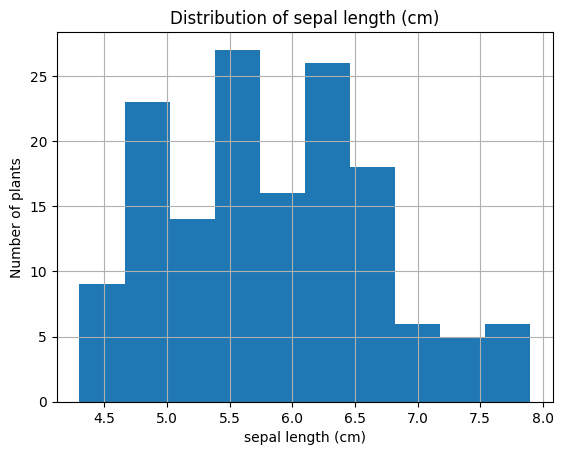

In [26]:
# The distribution of a specified feature for all the plants
feat = 'sepal length (cm)'
iris_df[feat].hist()
# Title
plt.title(f"Distribution of {feat}")
# X-axis
plt.xlabel(feat)
# Y-axis
plt.ylabel("Number of plants")
plt.show()

In [27]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

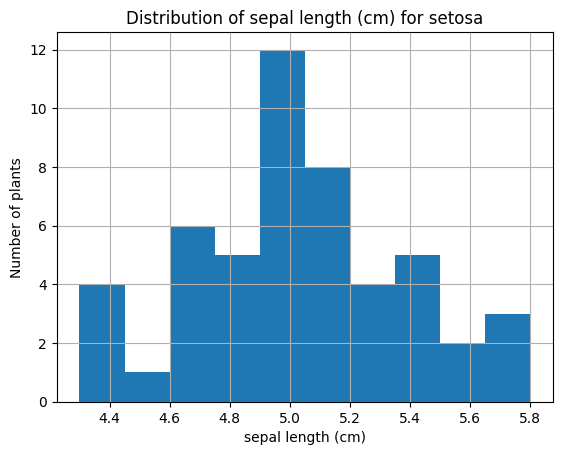

In [28]:
# The distribution of sepal lengths for a specified plant
plant = 0 # Iris-Setosa
iris_df[feat][iris_df['label'] == plant].hist()
# Title
plt.title(f"Distribution of {feat} for {iris_dataset.target_names[plant]}")
# X-axis
plt.xlabel(feat)
# Y-axis    
plt.ylabel("Number of plants")
plt.show()

**Scatter plots** can tell us how the various features differ among the different plants:

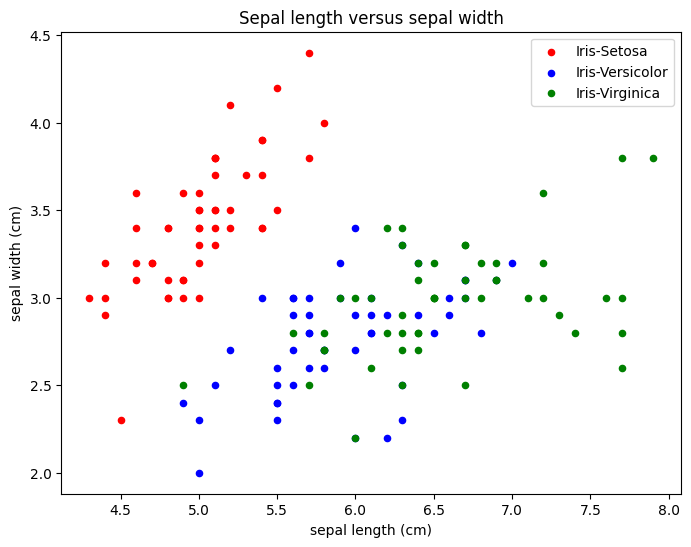

In [29]:
# Scatter plot for sepal length versus sepal width, colored by the plant class:

ax = iris_df[iris_df['label'] == 0].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='red', label='Iris-Setosa', figsize=(8,6))

iris_df[iris_df['label'] == 1].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='blue', label='Iris-Versicolor', ax=ax)

iris_df[iris_df['label'] == 2].plot.scatter(x='sepal length (cm)', y='sepal width (cm)', 
                                                    color='green', label='Iris-Virginica', ax=ax)
# Title
plt.title("Sepal length versus sepal width")

plt.show()

Pandas can actually create these plots for us for each pair of features in the data frame. We color the dots by their label using `c = iris_df['label']`.

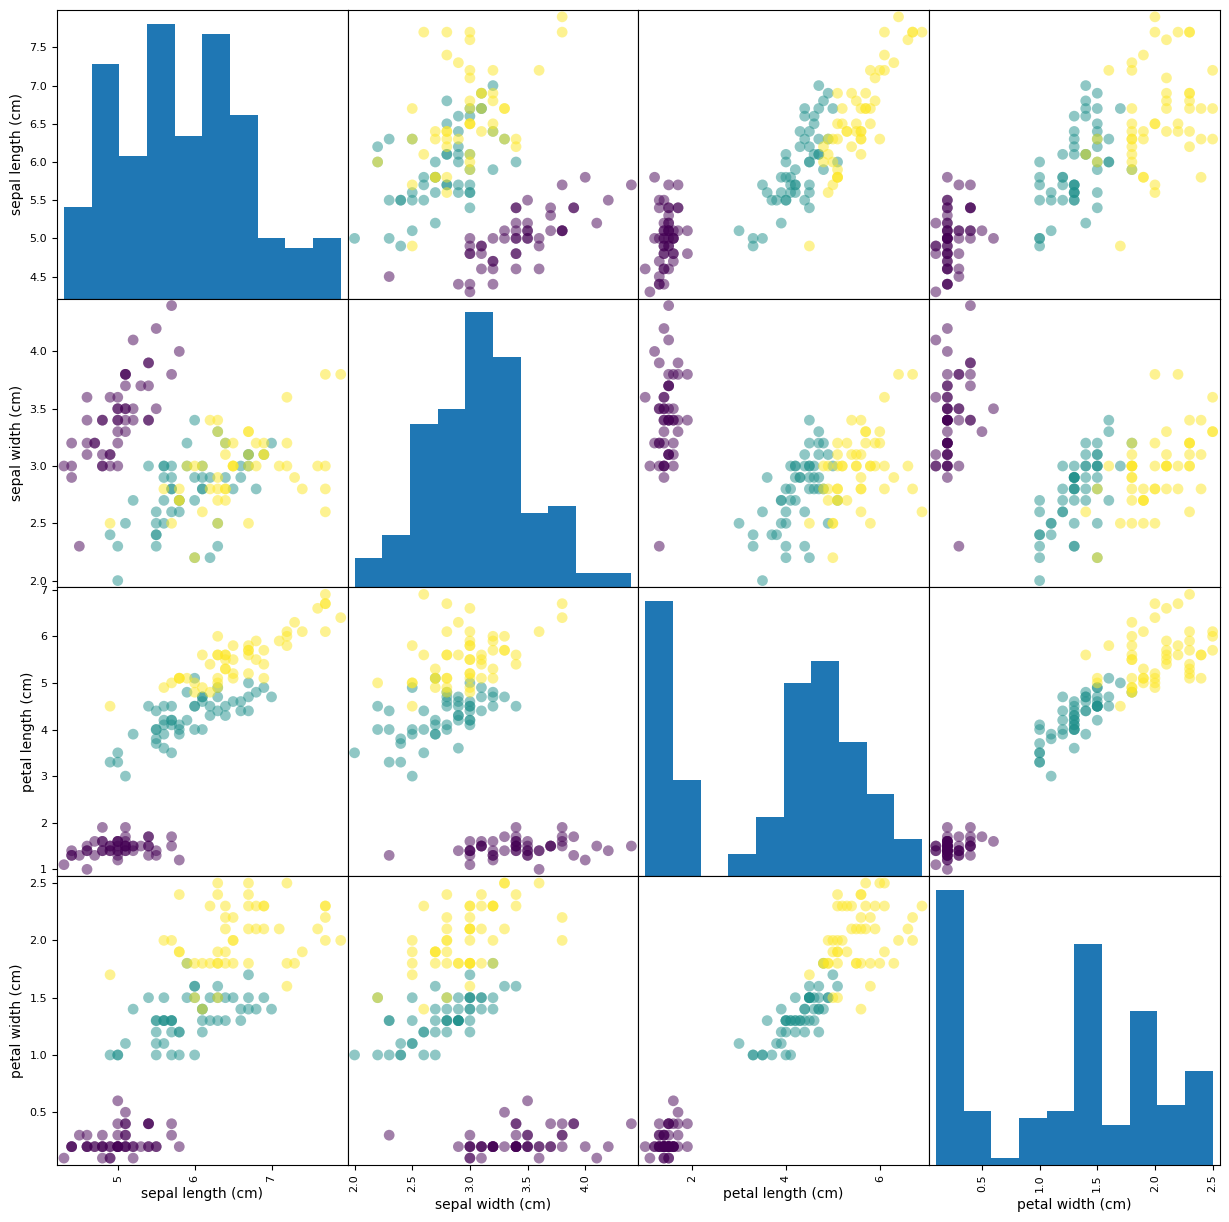

In [30]:
pd.plotting.scatter_matrix(iris_df[features], c=iris_df['label'], figsize=(15,15), marker='o', s=60)
plt.show()

We observe that the colors are highly separated. **To successfully train a machine learning model to distinguish the classes, therefore, seems promising!**

> Visualization of data forms a crucial part of applied machine learning. Carefully designed plots can reveal patterns in the data, which we can exploit when constructing predictive machine learning models. 

> More generally, **exploratory data analysis** using **plots**, **visualizations**, **statistics**, **probability**, and **baseline models** is a core part of all practical machine learning projects. We'll see that again and again throughout the course.

<img src="../assets/You.png" width="90"> EDA and VDA


<img src="../assets/GPT-MedAI.png" width="300">

EDA (Exploratory Data Analysis) and VDA (Visual Data Analysis) are crucial steps in any data-driven research, particularly in the context of medical AI and computational biomedicine. Let's delve into each of these:

### Exploratory Data Analysis (EDA)

1. **Definition**: EDA is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In medical AI, EDA is vital to understand the underlying patterns, anomalies, or trends in the data.

2. **Key Techniques**:
   - **Statistical Summaries**: Descriptive statistics like mean, median, mode, standard deviation, etc.
   - **Data Visualization**: Histograms, box plots, scatter plots, etc.
   - **Correlation Analysis**: Identifying relationships between variables.

3. **Importance in Medical AI**:
   - **Identifying Patterns**: Helps in understanding typical patterns within medical data such as patient records, imaging data, etc.
   - **Data Cleaning**: Assists in identifying missing or inconsistent data.
   - **Feature Selection**: Helps in identifying which features/variables may be most relevant for predictive modeling.

### Visual Data Analysis (VDA)

1. **Definition**: VDA focuses more intensely on the visual representation of data to uncover insights and patterns. It involves the use of graphical tools and interactive visualizations.

2. **Key Techniques**:
   - **Interactive Dashboards**: Tools like Tableau, PowerBI, or Python libraries (e.g., Dash, Bokeh) for interactive exploration.
   - **Complex Visualizations**: Heatmaps, dendrograms, complex scatter plots.
   - **Dimensionality Reduction Visualization**: Techniques like PCA (Principal Component Analysis) visualized through scatter plots.

3. **Importance in Medical AI**:
   - **Enhanced Interpretability**: Complex data like genomics or MRI images can be more easily interpreted.
   - **Real-Time Data Analysis**: Particularly important in monitoring patient vitals or real-time data streaming.
   - **Communication**: Useful for explaining complex data patterns to non-experts, such as clinicians or patients.

### Integrating EDA and VDA in Medical AI with Python and Jupyter Notebooks

In your courses, you might work on projects where EDA and VDA are integrated. Here’s how Python and Jupyter Notebooks can be instrumental:

- **Python Libraries**: Libraries like Matplotlib, Seaborn, and Plotly offer extensive functionalities for both EDA and VDA.
- **Notebooks for Interactivity**: Jupyter Notebooks are ideal for interactive data exploration, allowing you to combine code, visualizations, and narrative.
- **Reproducibility**: Notebooks help in documenting the EDA and VDA process, making your analysis reproducible and transparent – a key aspect of open science.

If you have a specific dataset or a type of medical data (e.g., MRI images, genomic data, patient records) you're working with, I can guide you through a more tailored EDA and VDA process using Python in a Jupyter Notebook environment. Let me know how I can assist you further!

> **Your turn!** To get a feeling for the many different ways you can visualize data, have a quick look at the example gallery of the Python library `seaborn`: https://seaborn.pydata.org/examples/index.html. Feel free to play around with the examples. Here's a guide to the plotting features of Pandas, also worth a look: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html. You'll make use of these throughout the course.

## Feature engineering / selecting features to use

We can choose to train a model on one or more of the features. Let's use `sepal length` and `sepal width`:

In [31]:
# We select the 0'th and 1'st row since these contain sepal length and width:
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

In [32]:
X.shape

(150, 2)

We now have access to two measurements (sepal length and width) for 150 flowers. From these features stored in X, our model should predict the correct label y.

Here are the first five measurements and their corresponding labels:

In [33]:
print(X[:5])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [34]:
print(y[:5])

[0 0 0 0 0]


0 means Setaosa, 1 is Versicolor and 2 is Virginica (remember that Python lists are indexed starting from 0):

In [35]:
list(zip(range(len(y)), iris_dataset['target_names']))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

> We're not using all four features to construct our predictive models because the problem would be _too easy_, as you'll see further below. 

> Note that data preparation in general, and what's called **feature engineering** in particular, is one of the most critical, time-consuming, and challenging parts of applied machine learning (yet often underappreciated). In fact, the actual modeling work in applied machine learning is a very minor part of real-world machine learning systems development. Most of the time (and code) is spent on other things, like collecting data, cleaning data, and designing good features. 

# Training and test data

We're building a machine learning model that should be able to predict Iris species for *new measurements*. To *simulate* such measurements, we leave out a set of data when constructing the model and use it to test the model. This set is called a **test set**. 

If we train the model using all the data, it'll typically be able to "remember" the data and not be able to produce correct predictions on *new* data. It will be bad at **generalization**. 

We use **training data to construct the model** and **test data to evaluate the model**.

<img src="../assets/You.png" width="90"> The train-test split rationale


<img src="../assets/GPT-MedAI.png" width="300">

The train-test split is a fundamental concept in machine learning, including in medical AI, and understanding its rationale is crucial. Let’s break it down:

### What is Train-Test Split?

1. **Definition**: In machine learning, datasets are typically split into two parts: a training set and a testing set. The model learns from the training set and is evaluated on the testing set.

2. **Typical Split Ratios**: Commonly, data is split in a 70-30, 80-20, or 60-40 ratio, where the larger portion is for training.

### Rationale Behind Train-Test Split

1. **Model Evaluation**: The primary purpose is to assess the performance of a model on new, unseen data. The test set acts as a proxy for future data.

2. **Overfitting Prevention**: Overfitting occurs when a model learns the noise and fluctuations in the training data to the extent that it negatively impacts the performance on new data. A separate test set helps in detecting this.

3. **Model Tuning**: The train-test split allows for the tuning of model parameters and the selection of the best model. 

4. **Generalization**: Ensures that the model can generalize from the training data to other data sets (the ultimate goal of most machine learning models).

### Train-Test Split in Medical AI

1. **Data Sensitivity**: In medical applications, the quality and sensitivity of data (like patient records, imaging data) make it imperative that models are robust and generalize well.

2. **Clinical Validation**: For clinical use, it’s essential to demonstrate that a model works well not just on the data it was trained on, but also on new, unseen data.

3. **Ethical Considerations**: Overfitting or poorly generalized models can lead to incorrect diagnoses or treatments, so the train-test split is vital for patient safety.

### Implementing Train-Test Split in Python

In Python, particularly when working in Jupyter Notebooks for medical AI applications, you can use libraries like `scikit-learn` to easily implement train-test splits:

```python
from sklearn.model_selection import train_test_split

# Assuming X is your features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80-20 split
```

It's crucial to ensure that the split represents the overall dataset well. In medical datasets, stratified sampling might be necessary to ensure that the split is representative, especially when dealing with imbalanced datasets (e.g., rare diseases).

Remember, the ultimate goal is to develop a model that not only performs well on the training data but also generalizes well to new, unseen data, which is especially critical in medical applications. If you have a specific project or dataset you are working with, I can provide more tailored advice on how to effectively implement a train-test split in that context.

Scikit-learn has a convenient `train_test_split` function that we'll use to set aside 25% of our data (including the corresponding labels) to be used as test data: 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')

Training data: (112, 2)
Test data: (38, 2)


Let's collect the training data in a dataframe and display it:

In [39]:
iris_df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'][0:2])

In [40]:
iris_df.head(10)

,sepal length (cm),sepal width (cm)
0,5.0,3.6
1,5.2,4.1
2,5.8,2.7
3,6.0,3.4
4,6.7,3.1
5,5.4,3.9
6,5.4,3.7
7,5.5,2.4
8,6.3,2.8
9,6.4,3.1


...same with the test data

In [41]:
iris_df_test = pd.DataFrame(X_test, columns=iris_dataset['feature_names'][0:2])
iris_df_test.head(10)

,sepal length (cm),sepal width (cm)
0,6.1,2.8
1,5.7,3.8
2,7.7,2.6
3,6.0,2.9
4,6.8,2.8
5,5.4,3.4
6,5.6,2.9
7,6.9,3.1
8,6.2,2.2
9,5.8,2.7


# Machine learning model

Many different machine learning models can be used for classification. 

One of the most flexible (and best!) types of model are the so-called tree-based models&mdash;for example, **random forests**, based on **decision trees**. You can read about random forests here: http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees, and about decision trees here: http://scikit-learn.org/stable/modules/tree.html. 

<img src="../assets/You.png" width="90">  Many different machine learning models can be used for classification.  What are the most flexible (and best!) types of models?
<img src="../assets/GPT-MedAI.png" width="300">

In the realm of machine learning, especially for classification tasks, several models are known for their flexibility and strong performance. The "best" model often depends on the specific characteristics of the data and the problem at hand. However, some models are generally recognized for their robustness and versatility:

### 1. **Random Forest**
- **Nature**: An ensemble of decision trees.
- **Flexibility**: Works well with both categorical and continuous variables.
- **Strengths**: Good for handling non-linear data, less prone to overfitting than individual decision trees.
- **Use in Medical AI**: Effective in handling complex datasets like patient records or genetic data.

### 2. **Gradient Boosting Machines (GBM)**
- **Examples**: XGBoost, LightGBM, CatBoost.
- **Nature**: Builds an ensemble of trees sequentially, each tree correcting the errors of the previous ones.
- **Flexibility**: Highly customizable with numerous hyperparameters.
- **Strengths**: Often provides high accuracy, handles different types of data well.
- **Use in Medical AI**: Useful in predictive modeling for patient outcomes, biomarker discovery.

### 3. **Support Vector Machines (SVM)**
- **Nature**: Finds the optimal hyperplane that best separates the classes in the feature space.
- **Flexibility**: Kernel trick transforms non-linearly separable data to separable in higher dimensions.
- **Strengths**: Effective in high-dimensional spaces, robust against overfitting in moderate-dimensional spaces.
- **Use in Medical AI**: Particularly good for image classification and bioinformatics.

### 4. **Neural Networks / Deep Learning**
- **Examples**: Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs).
- **Nature**: Composed of layers of interconnected nodes or neurons.
- **Flexibility**: Can learn complex patterns, adaptable to various types of data (images, text, time-series).
- **Strengths**: State-of-the-art performance in many tasks, especially with large datasets.
- **Use in Medical AI**: Ideal for medical image analysis, genomics, and EHR data analysis.

### 5. **K-Nearest Neighbors (KNN)**
- **Nature**: Classifies a sample based on the majority class of its 'k' nearest neighbors.
- **Flexibility**: Simple and effective, works well with smaller datasets.
- **Strengths**: No assumptions about the data, useful for non-linear data.
- **Use in Medical AI**: Can be used for diagnostic systems where similarity to known cases is key.

### Factors to Consider When Choosing a Model:
- **Data Size and Quality**: Some models require large datasets (e.g., deep learning), while others can work with smaller ones.
- **Computational Resources**: Models like deep learning require significant computational power.
- **Interpretability**: Models like random forests or decision trees are more interpretable than, say, neural networks.
- **Problem Specifics**: The nature of the medical problem (e.g., image analysis, genetic data, clinical predictions) can dictate the model choice.

### Conclusion
There's no one-size-fits-all answer in machine learning. The best approach is often to experiment with various models and use cross-validation to assess their performance. In medical AI, where the stakes are high, it's particularly important to thoroughly validate models and understand their strengths and limitations in the context of the specific medical application.

If you're working on a specific classification problem or dataset in your course, I can provide more detailed guidance on selecting and implementing these models in Python, considering your specific context.


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) # random_state for reproducibility

Classification models in scikit-learn are Python classes and always come with `fit` and `predict` methods. `fit` is used to adapt the model to the data (i.e., *train* the model), while `predict` is used to produce predictions.

<img src="../assets/You.png" width="90"> Explain fit and predict like I am five

<img src="../assets/GPT-MedAI.png" width="300">

Alright, let's imagine we're playing a fun game to understand "fit" and "predict" in machine learning!

### Imagine You're Training a Robot: "Fit"

1. **Your Toy Robot**: Think of a toy robot you're teaching to recognize fruits.
2. **Showing Pictures**: You show it pictures of apples and bananas. Each time you show a picture, you tell your robot, "This is an apple" or "This is a banana."
3. **Robot Learns**: As you keep showing pictures, your robot starts understanding (or "fitting") what apples and bananas look like. It's like when you learn to recognize your toys by playing with them again and again.

So, in machine learning, "fitting" a model is like teaching your robot. You give it examples, and it learns from them.

### Making the Robot Guess: "Predict"

1. **Test Time**: Now, it's time to see if your robot has learned well. You show it a new picture of a fruit, but you don't tell it what it is.
2. **Robot Guesses**: Your robot uses what it learned to guess if it's an apple or a banana.
3. **Surprise!**: If your robot guesses right, it means it learned well from the "fitting" phase. It's like when you guess the name of a new toy correctly because it looks like one you already have.

In machine learning, "predicting" is like asking your model (your toy robot) to make a guess about new data (a new picture) based on what it has learned.

### So, In Simple Words:

- **Fitting**: Teaching your robot (the model) with examples so it learns.
- **Predicting**: Letting your robot (the model) guess on its own about new things it hasn't seen before.

It's a bit like teaching and then testing, but with a robot and pictures of fruits! 🤖🍎🍌

<img src="../assets/You.png" width="90"> Explain fit and predict to a medical student or a medical doctor or a biomedical researcher

<img src="../assets/GPT-MedAI.png" width="300">

Certainly! Let's put the concepts of "fit" and "predict" in machine learning into a context that's more familiar to someone in the medical field, such as a medical student, doctor, or biomedical researcher.

### Fit: Training the Model

1. **Medical Analogy**: Think of "fitting" a model in machine learning as training a resident doctor. During their training, resident doctors observe and learn from various cases, guided by more experienced physicians. They assimilate this knowledge, which helps them make diagnoses in the future.

2. **In Machine Learning**: When we "fit" a model, we're essentially training it on a set of data. This data includes both the input (like patient symptoms, test results, etc.) and the output (diagnoses). The model learns to associate specific inputs with corresponding outputs, akin to a resident learning which symptoms often lead to which diagnoses.

3. **Learning Patterns**: Just as a resident learns patterns (like certain symptoms often indicating a specific disease), the fitting process involves the model learning patterns within the data that can be used to make predictions.

### Predict: Using the Model to Make Inferences

1. **Medical Analogy**: Once the resident is trained and faced with new patients, they use their knowledge to diagnose these patients. They haven't seen these specific cases before, but they apply what they've learned to make informed decisions.

2. **In Machine Learning**: Similarly, "predicting" involves using the trained model to make inferences on new, unseen data. This is like presenting new patient cases to our now-trained resident. The model uses the patterns it learned during the fitting phase to predict the output for this new data.

3. **Application in Medicine**: In a practical medical context, this could mean using a fitted model to predict patient outcomes, diagnose diseases from imaging data, or identify potential treatments based on patient history and symptoms.

### In Summary

- **Fitting a Model**: Training the model on known data, where the answers (diagnoses) are known. This is akin to the education and training phase of a medical professional.
- **Predicting with a Model**: Using the trained model to make inferences or diagnoses on new data where the answers aren't known beforehand. It's like a trained doctor making diagnoses on new patients.

Understanding these concepts is crucial in medical AI, where machine learning models are increasingly used for diagnostics, treatment planning, and understanding complex patterns in biomedical data.

<img src="../assets/You.png" width="90"> Explain fit and predict like and expert

<img src="../assets/GPT-MedAI.png" width="300">

Certainly! When addressing "fit" and "predict" in the context of machine learning from an expert standpoint, we delve into more technical and conceptual depths.

### Fit: Model Training and Parameter Estimation

1. **Conceptual Framework**: "Fitting" a model in machine learning involves adjusting the model's parameters so that it can approximate a function that maps input data (features) to output data (targets). It's an optimization process where the model learns from a given dataset by minimizing a loss function.

2. **Process Details**:
   - **Parameter Learning**: For example, in a linear regression model, fitting involves calculating the coefficients that minimize the difference between predicted and actual values (minimizing the mean squared error, for instance).
   - **Complex Models**: In more complex models like neural networks, fitting involves adjusting weights and biases across multiple layers through backpropagation, based on a gradient descent algorithm or its variants.

3. **Overfitting and Regularization**: An essential part of fitting is ensuring the model doesn't overfit—where it performs well on training data but poorly on unseen data. Techniques like regularization (L1, L2), dropout (in neural networks), or pruning (in decision trees) are used to prevent this.

### Predict: Making Inferences from the Model

1. **Application Phase**: Once the model is fitted, it can be used to make predictions. This involves feeding new input data into the model and letting the model output its predictions based on the learned parameters.

2. **Mechanics**:
   - **Linear and Logistic Models**: For simpler models, predictions are a direct computation using the learned coefficients.
   - **Ensemble and Complex Models**: In models like random forests or neural networks, the prediction process involves more sophisticated calculations, like averaging outputs from multiple trees or forward propagation through a network.

3. **Uncertainty and Probabilities**: In many cases, especially in classification tasks, models also provide a measure of uncertainty or probability for each prediction, which is crucial in fields where decision-making is risk-sensitive, like in medicine.

### Expert Considerations

- **Model Complexity vs. Interpretability**: Experts balance the complexity of the model (which often brings higher accuracy) with the need for interpretability, especially in fields like medicine or finance.
- **Validation Techniques**: Experts use techniques like cross-validation or bootstrapping to ensure that the model's ability to fit and predict is robust and generalizes well to new data.
- **Custom Loss Functions**: Sometimes, custom loss functions are created to fit specific needs or constraints of the problem at hand, especially in specialized fields like medical diagnosis or financial forecasting.

In summary, "fitting" is about optimally adjusting a model to represent the underlying patterns in the training data, while "predicting" is about applying this model to new data to make informed estimates or decisions. The sophistication in these processes varies greatly depending on the model's complexity and the application's requirements.

<img src="../assets/You.png" width="90"> Make an example in Python illustrating model fitting and prediction

<img src="../assets/GPT-MedAI.png" width="300">

Certainly! Let's create an example using Python where we'll fit a model to a dataset and then use it for prediction. We'll use a simple linear regression model for this demonstration, which is a fundamental machine learning technique suitable for illustrating these concepts.

### Scenario:
Suppose we have a dataset that relates the hours a medical student studies to their exam scores. We want to predict the exam score based on the number of study hours.

### Steps:
1. **Create a Synthetic Dataset**: We'll generate a simple dataset for this example.
2. **Fit a Linear Regression Model**: We'll train (fit) the model on this dataset.
3. **Predict New Data**: Use the model to predict exam scores for new data (new study hours).

Let's start coding this in Python. I'll guide you through each step:

```python
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Create a Synthetic Dataset
# Let's assume a simple linear relationship: score = 10 * hours_studied + some_noise
np.random.seed(0)  # for reproducible results
hours_studied = np.random.rand(100, 1) * 10  # random hours between 0 and 10
scores = 10 * hours_studied + np.random.randn(100, 1) * 5  # add some random noise

# Step 2: Fit a Linear Regression Model
model = LinearRegression()
model.fit(hours_studied, scores)

# Step 3: Predict New Data
new_hours_studied = np.array([[4], [6], [8]])  # new data: 4, 6, and 8 hours
predicted_scores = model.predict(new_hours_studied)

# Print Predicted Scores
print("Predicted Scores for Study Hours (4, 6, 8):", predicted_scores.flatten())

# Bonus: Plotting the Data and the Regression Line
plt.scatter(hours_studied, scores, color='blue', label='Actual Scores')
plt.plot(new_hours_studied, predicted_scores, color='red', label='Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.legend()
plt.show()
```

### Explanation:
- **Dataset Creation**: We create a simple linear dataset where exam scores increase with study hours. Real-world datasets are more complex, but this serves our illustrative purpose.
- **Model Fitting**: The `LinearRegression` model from `sklearn` is fitted to our synthetic dataset. This process involves finding the best line that fits our data.
- **Prediction**: We then predict scores for new study hours (4, 6, 8) using our trained model.
- **Visualization**: The plot shows the relationship between study hours and scores, along with our model's predictions.

This code provides a foundational example of how model fitting and prediction work in machine learning. You can run this (**see below**) in a Python environment, such as Jupyter Notebook, to see the results and the plot. Let me know if you need further explanations or more complex examples!

Predicted Scores for Study Hours (4, 6, 8): [40.98462543 60.92156045 80.85849547]


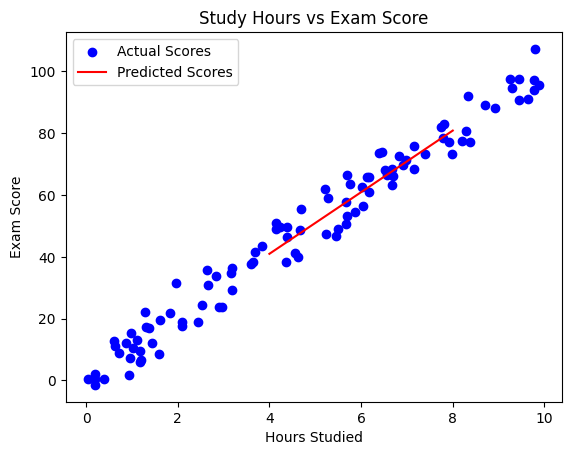

In [44]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Create a Synthetic Dataset
# Let's assume a simple linear relationship: score = 10 * hours_studied + some_noise
np.random.seed(0)  # for reproducible results
hours_studied = np.random.rand(100, 1) * 10  # random hours between 0 and 10
scores = 10 * hours_studied + np.random.randn(100, 1) * 5  # add some random noise

# Step 2: Fit a Linear Regression Model
model = LinearRegression()
model.fit(hours_studied, scores)

# Step 3: Predict New Data
new_hours_studied = np.array([[4], [6], [8]])  # new data: 4, 6, and 8 hours
predicted_scores = model.predict(new_hours_studied)

# Print Predicted Scores
print("Predicted Scores for Study Hours (4, 6, 8):", predicted_scores.flatten())

# Bonus: Plotting the Data and the Regression Line
plt.scatter(hours_studied, scores, color='blue', label='Actual Scores')
plt.plot(new_hours_studied, predicted_scores, color='red', label='Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.legend()
plt.show()


_Back to our flowers ..._

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

As you see, there are a bunch of parameters to choose in a `RandomForestClassifier`: 

In [46]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

For now we're just using default values.

# Evaluate the model

In [47]:
y_pred = rf.predict(X_test)

The model has now made predictions on the test data, and we can check how well it performed. The *accuracy* of the predictions is a natural way to gauge performance. That is, the number of correct predictions divided by the total number of predictions. 

Throughout the course, we'll learn about many other ways to evaluate machine learning models.

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, y_pred)

0.7894736842105263

> **Your turn!**
- You can also use `rf.score` to find the accuracy. Try that.
- Try to change the default parameters in `RandomForestClassifier`. Can you get a better accuracy? Hint: try increasing `n_estimators`. We'll learn about what the parameters mean later in the course.
- Try to use all four features in the model (petal and sepal lengths and widths). How does the random forest perform?
- Change `RandomForestClassifier` to another classifier. For example `SGDClassifier`. Hint: `from sklearn.linear_model import SGDClassifier`.

<img src="../assets/You.png" width="90"> Explain model evaluation to me

<img src="../assets/GPT-MedAI.png" width="300">

Model evaluation is a critical step in the machine learning process. It's about assessing how well your machine learning model performs, particularly in terms of its accuracy and ability to generalize to new data. In medical AI, where decisions can significantly impact patient outcomes, robust model evaluation is especially crucial.

### Key Concepts of Model Evaluation

1. **Accuracy and Error Rates**: At its simplest, model evaluation often looks at how often the model makes correct predictions (accuracy) and how often it is wrong (error rate). 

2. **Confusion Matrix**: This is a table used to describe the performance of a classification model. It shows the true positives, false positives, true negatives, and false negatives. This is particularly important in medical diagnostics where false negatives and false positives have different implications.

3. **Precision and Recall**: 
   - **Precision**: Out of all the positive predictions, how many were actually correct? It's crucial when the cost of false positives is high.
   - **Recall (Sensitivity)**: Of all the actual positive cases, how many were correctly identified by the model? In medical terms, this is similar to the concept of sensitivity.

4. **F1 Score**: The harmonic mean of precision and recall. It's a balance between the two and is useful when you need a single metric to compare models.

5. **ROC Curve and AUC**: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate at various threshold settings. The area under this curve (AUC) provides a single measure of a model's performance across different threshold settings.

6. **Cross-Validation**: This involves dividing the dataset into multiple parts, training the model on some parts, and testing it on others. This helps ensure that the model performs well not just on one particular subset of the data.

### Model Evaluation in Medical AI

- **Clinical Relevance**: In medical AI, metrics like sensitivity and specificity become critically important. For instance, in cancer diagnosis, missing a true case (high false negative) can be more dangerous than incorrectly identifying cancer (false positive).

- **Handling Imbalanced Data**: Medical datasets are often imbalanced (e.g., more healthy patients than sick). This requires careful evaluation, as a model might appear accurate simply by predicting the majority class.

- **Ethical Considerations**: The consequences of predictions (like false negatives or positives) in medical contexts can be significant, requiring thorough evaluation and validation.

### Implementing Model Evaluation in Python

Using Python libraries like scikit-learn, you can implement these evaluation metrics. For instance, you can generate a confusion matrix, calculate precision, recall, F1 score, and plot ROC curves to assess your model's performance.

### Conclusion

Model evaluation in machine learning, especially in medical AI, is not just about achieving high accuracy but also about ensuring the model's predictions are reliable, valid, and clinically relevant. It involves a combination of statistical measures and domain-specific considerations. 

Would you like to see a practical example of how these evaluation metrics are implemented in Python, or do you have a specific model or dataset in mind for a more tailored explanation?

# All the code gathered

Here's the code we used to load the data, select features, split into train and test sets, train a model, predict and evaluate. Eight lines of code!

In [50]:
# Load the data and split into data and labels
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

## The beauty of our **Medical AI Assistant**

<img src="../assets/You.png" width="90">  Make a rigorous evaluation of a Random Forest model trained to classify the Iris dataset

<img src="../assets/GPT-MedAI.png" width="300">

Certainly! We'll perform a rigorous evaluation of a Random Forest classifier trained on the famous Iris dataset. This dataset includes measurements (sepal length, sepal width, petal length, and petal width) of three types of iris flowers (setosa, versicolor, and virginica).

Our evaluation will include the following steps:
1. Loading and splitting the dataset into training and testing sets.
2. Training a Random Forest classifier.
3. Evaluating the model using various metrics.
4. Performing cross-validation to assess the model's robustness.

Let's go through the Python code for each of these steps:

```python
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Load Data and Split
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Step 4: Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Average 10-Fold CV Score:", np.mean(cv_scores))
```

### Explanation:
- **Data Loading and Splitting**: We load the Iris dataset and split it into training and testing sets.
- **Model Training**: We use the `RandomForestClassifier` from scikit-learn to train our model.
- **Accuracy**: We first look at the overall accuracy of the model on the test set.
- **Classification Report**: This includes precision, recall, and F1-score for each class, giving us a detailed view of the model's performance.
- **Confusion Matrix**: This visualizes the model's performance, showing us the true positives, false positives, true negatives, and false negatives.
- **Cross-Validation**: We perform 10-fold cross-validation to assess how the model performs across different subsets of the data.

### Note:
- The Iris dataset is relatively simple and balanced, so advanced techniques like handling imbalanced data or ROC curves (which are more informative for binary classification) are not included here.
- The Random Forest model typically performs well on this dataset, but in a real-world scenario, you would also consider tuning the model's hyperparameters.

This code provides a comprehensive evaluation of the model's performance. You can run this in a Python environment to see the results. Let me know if you need further explanations or adjustments for a different scenario!

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



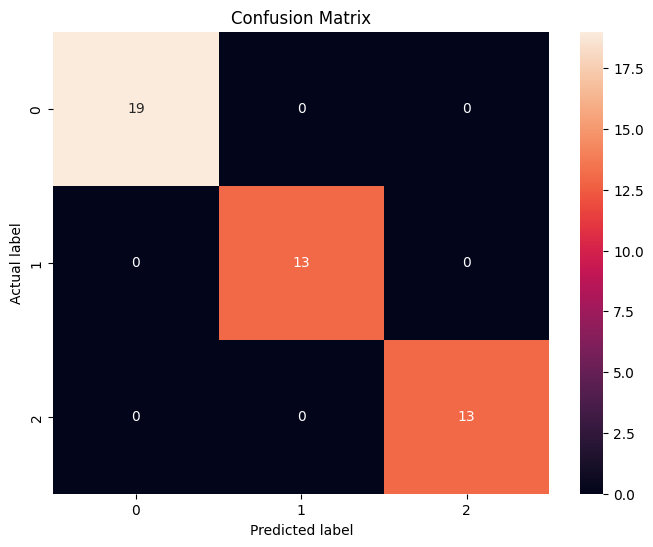

Cross-Validation Scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
Average 10-Fold CV Score: 0.96


In [51]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Load Data and Split
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Step 4: Cross-Validation
cv_scores = cross_val_score(rf_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Average 10-Fold CV Score:", np.mean(cv_scores))


# Another example - _The Pima Indians Diabetes Database_

## Load, explore and prepare the data

Let's repeat the procedure on another benchmark data set: **Diabetes Data Set**. You'll find a description of the data set together with a link to the data here:  https://www.kaggle.com/uciml/pima-indians-diabetes-database. The data set is also available here: https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv.

In [52]:
url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'

As usual, we use Pandas to inspect and process text data:

In [53]:
diabetes = pd.read_csv(url)

In [54]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
len(diabetes)

768

We notice that there are eight feature columns and one target column (diabetes).

More information about the data can be found using `describe` and `info`:

In [56]:
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It's all numbers, and all the samples contain values for all the features (there are 768 non-NaN values). 

Here's a description of each feature (from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database">Kaggle</a>):
- Pregnancies: number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic: Diastolic blood pressure (mm Hg)
- Triceps: Triceps skin fold thickness (mm)
- Insulin: 2-hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DPF: Diabetes pedigree function
- Age: Age (years)
- Diabetes: Class variable (0 or 1)

As before we can visualize the connection between the features in a scatter plot, where each sample is colored by whether it belongs to a diabetic persons or not:

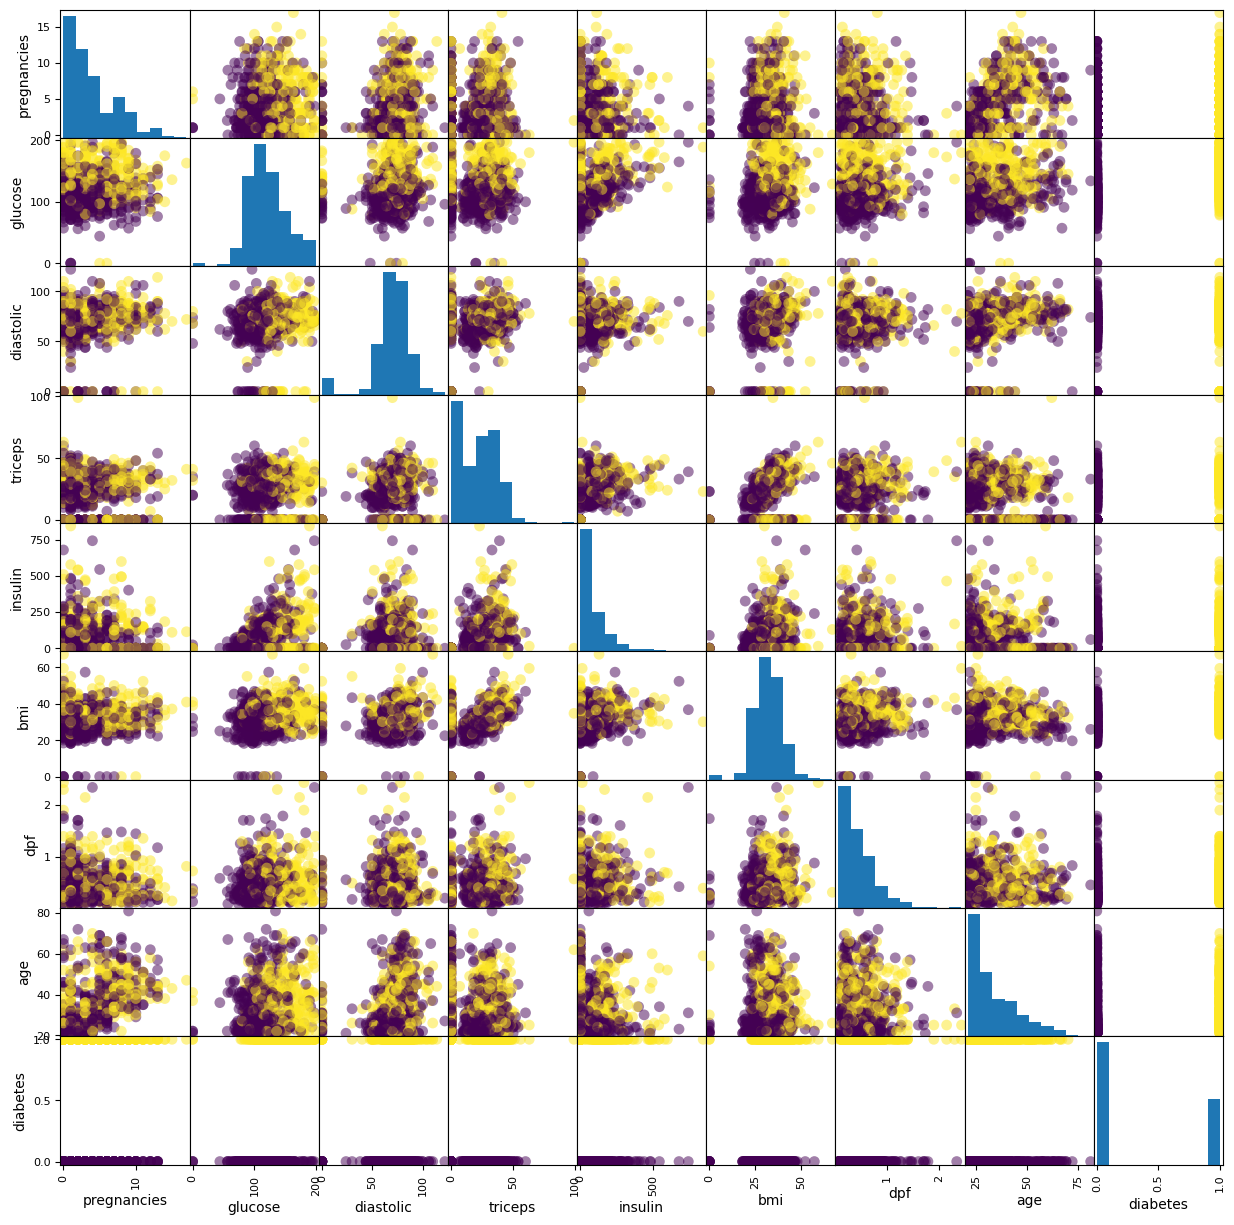

In [58]:
pd.plotting.scatter_matrix(diabetes, c=diabetes['diabetes'], figsize=(15,15), marker='o', s=60)
plt.show()

We observe that this seems like a tougher problem than Iris. Still, let's follow the same procedure: 

### Select which features to use

... this time we'll use all the features to construct our model. We let `X` consist of all columns except `diabetes`:

In [59]:
X = diabetes[diabetes.columns[0:-1]]           

In [60]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


The target variable is in the `diabetes` column. `1` means diabetes, `0` not diabetes.

In [61]:
y = diabetes['diabetes']

In [62]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

### Training and test data

We split into training and test sets:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine learning model

... and train a random forest model:

In [64]:
rf = RandomForestClassifier(random_state=42, n_estimators=100) 
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Evaluate the model

Now we can make predictions on the test set and compute the accuracy:

In [66]:
y_pred = rf.predict(X_test)

In [67]:
accuracy_score(y_test, y_pred)

0.734375

With this model we can predict diabetes from the given features with an accuracy of 73%.

# Machine learning models are highly generic!

> **Important!** Notice that the way we studied the diabetes data was essentially identical to what we did for Iris! 

In [68]:
# Load the data
iris_dataset = load_iris()
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.7894736842105263

In [69]:
# Load the data
diabetes = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv')
X = diabetes[diabetes.columns[0:-1]] 
y = diabetes['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Import and train a machine learning model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy_score(y_test, y_pred)

0.734375

**The only difference is that we changed the data!** 

> **Machine learning models are generic: the same model can be used for many different tasks!**

# Further study of diabetes: understanding the model's predictions

An important part of constructing good machine learning models is inspecting what the model has learned, how it weighs the various features when making its decisions in specific cases, how it would react if the features were different in some interesting ways, and so on. This is useful both for improving the models and the input data and, sometimes, to better understand the problem the model tries to solve (here's a very interesting example of this [img1](assets/stanford_1.png), [img2](assets/stanford_2.png), from [here](https://www.nature.com/articles/s41746-018-0029-1).

For example, what features are the most and least important for our diabetes classifier? What's the relation between BMI and diabetes according to our model? 

## Feature importance

When using random forests it's possible to compute how much each feature influenced the predictions. The so-called **feature importance**.

<img src="../assets/You.png" width="90"> Explain feature importance to me

<img src="../assets/GPT-MedAI.png" width="300">

Feature importance is a concept in machine learning that helps to understand the relative importance or contribution of each feature (input variable) in predicting the target variable in a model. It's particularly valuable in contexts like medical AI, where understanding which factors are most influential in diagnoses, prognoses, or treatment responses can be crucial.

### Understanding Feature Importance

1. **What It Tells Us**: Feature importance indicates how much each feature in your dataset contributed to the accuracy of a model. For example, in a model predicting patient health outcomes, feature importance could reveal whether age, blood pressure, or cholesterol levels are more significant predictors.

2. **Model Interpretability**: It enhances the interpretability of the model, providing insights into which features are most influential. This is vital in fields like medicine, where understanding the 'why' behind a model's prediction is as important as the prediction itself.

### How It's Calculated

1. **Coefficients in Linear Models**: In linear models (like linear regression), the coefficients can indicate feature importance. A higher absolute value of the coefficient means more importance.

2. **Tree-Based Models**: In tree-based models like Random Forests or Gradient Boosting, importance is often calculated based on how much each feature decreases the impurity of the split (e.g., Gini impurity in classification tasks).

3. **Permutation Feature Importance**: This involves shuffling the values of each feature one at a time and measuring how much the shuffle decreases the accuracy of the model. If shuffling a feature significantly reduces accuracy, that feature is considered important.

4. **SHAP Values**: SHAP (SHapley Additive exPlanations) values are a unified approach to explain the output of any machine learning model. They represent the average marginal contribution of a feature across all possible combinations.

### Considerations in Medical AI

- **Clinical Relevance**: Importance must align with clinical knowledge. A feature might be statistically significant but not clinically relevant.

- **Correlation vs. Causation**: High importance doesn't imply causation. For example, a feature might appear important for predicting heart disease, but it could be correlated with the actual causal factor.

- **Model Dependence**: The method of calculating feature importance can vary between different types of models, and some methods might be more appropriate for certain models than others.

- **Data Quality**: The quality of the input data greatly affects feature importance. Biased or noisy data can lead to misleading importance metrics.

In practical terms, understanding feature importance can guide clinical decision-making, inform further research, and help in refining models for better accuracy and reliability. It's a tool for both improving model performance and gaining deeper insights into the underlying phenomena being modeled.

In [70]:
importances = rf.feature_importances_

In [71]:
importances

array([0.07449143, 0.27876091, 0.08888318, 0.07157507, 0.07091345,
       0.15805822, 0.11822478, 0.13909297])

In [72]:
# Find index of those with highest importance, sorted from largest to smallest:
indices = np.argsort(importances)[::-1]

In [73]:
for f in range(X.shape[1]): 
    print(f'{X.columns[indices[f]]}: {np.round(importances[indices[f]],2)}')

glucose: 0.28
bmi: 0.16
age: 0.14
dpf: 0.12
diastolic: 0.09
pregnancies: 0.07
triceps: 0.07
insulin: 0.07


Let's plot these results:

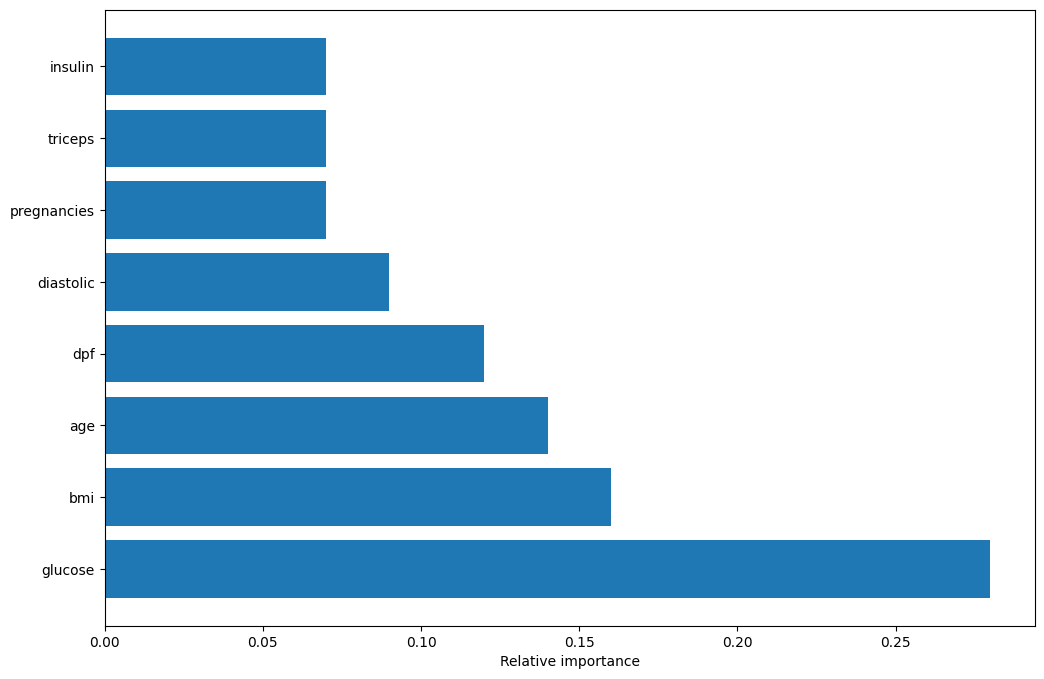

In [74]:
f, ax = plt.subplots(figsize=(12,8))
plt.barh(X.columns[indices], np.round(importances[indices],2))
plt.xlabel("Relative importance")
plt.show()

The glucose level has the largest explanatory value, followed by BMI. It's not hard to imagine that this kind of information is beneficial in practice! However, it is something that **must be used carefully**, as the feature importances derived from a single model can be quite misleading. 

Feature importances in the random forest classification models of scikit-learn are based on measuring how efficient each feature is in reducing uncertainty (the so-called *impurity* in random forests). Unfortunately, this often results in an incorrect estimate of how important each feature actually is (see https://explained.ai/rf-importance/index.html for a deep-dive into this issue). 

A more robust technique is what's called **permutation importance**. 

## Permutation importance

The idea behind permutation importance is that if a feature is important for the predictions of a trained model, then a random shuffling of the data in the corresponding column should drastically reduce the model's accuracy. On the other hand, a random shuffling of an unimportant feature shouldn't impact the model much. 

In [75]:
from sklearn.inspection import permutation_importance

In [76]:
r = permutation_importance(rf, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

Here are the results:

In [77]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]:<8}"
    f"{r.importances_mean[i]:.3f}"
    f" +/- {r.importances_std[i]:.3f}")

glucose 0.098 +/- 0.026
bmi     0.013 +/- 0.020
dpf     0.013 +/- 0.016
insulin 0.010 +/- 0.011
age     0.000 +/- 0.020
pregnancies-0.009 +/- 0.014
diastolic-0.010 +/- 0.011
triceps -0.012 +/- 0.009


...and as a plot:

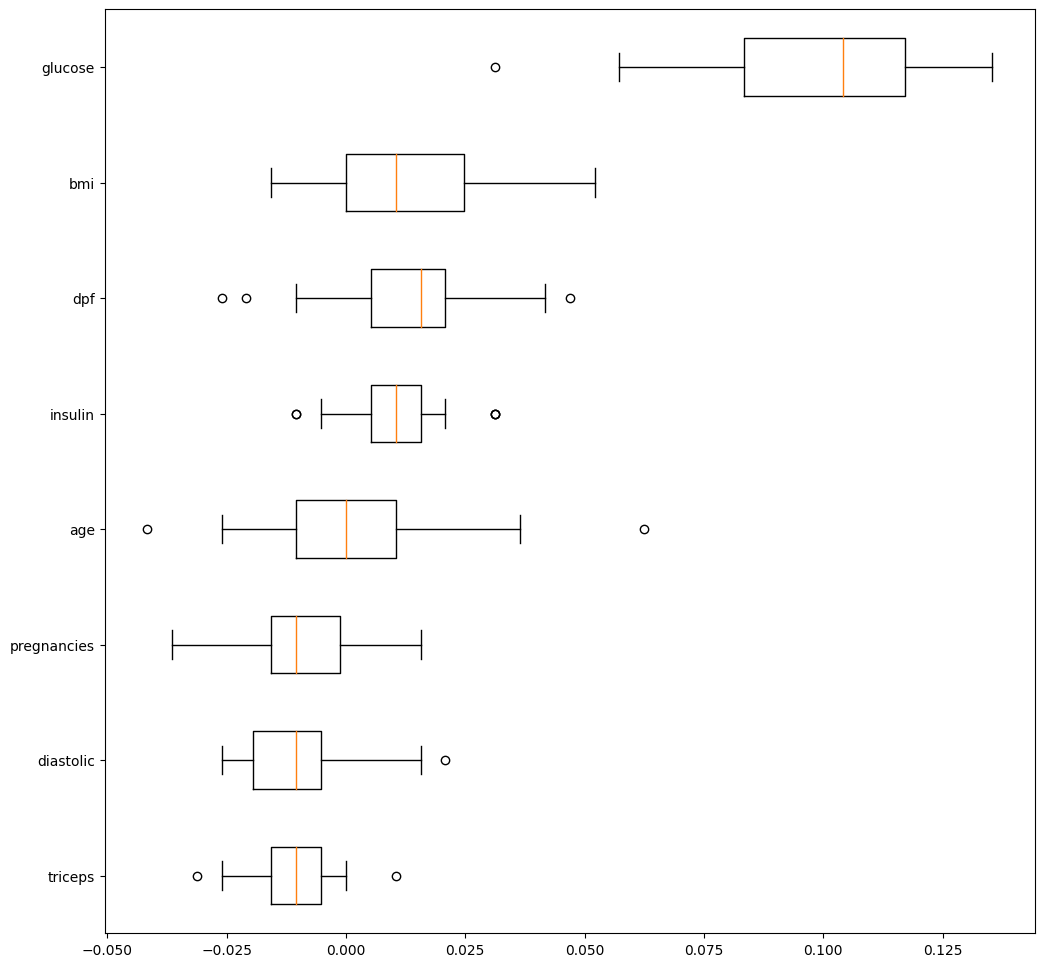

In [78]:
# Get the sorted indices of the features according to mean importance
r_sorted_idx = r.importances_mean.argsort()

# Create a boxplot
fig, ax = plt.subplots( figsize=(12, 12))
ax.boxplot(
    r.importances[r_sorted_idx].T,
    vert=False,
    labels=X_test.columns[r_sorted_idx],
)
plt.show()

We observe that `glucose` is the most important feature by far. If you shuffle `glucose`, the model accuracy decreases by more than ten percentage points. The four features with negative weights were useless for the predictions: if you shuffle these at random you will sometimes obtain slightly *better* accuracy!

<img src="../assets/You.png" width="90"> In the context of feature importance, explain shap values to me

<img src="../assets/GPT-MedAI.png" width="300">

**SHAP (SHapley Additive exPlanations) values** provide a powerful and unified framework to interpret machine learning model predictions, particularly in terms of feature importance. Developed based on [cooperative game theory](https://en.wikipedia.org/wiki/Cooperative_game_theory), SHAP values offer a way to understand the contribution of each feature to the prediction of a specific instance, making them highly useful in fields like medical AI where interpretability is crucial.

### Fundamentals of SHAP Values

1. **Game Theory Background**: SHAP values are derived from Shapley values in game theory, which are a method to fairly distribute the 'payout' (or contribution) among players (features) in a coalition (model).

2. **Individual Prediction Explanation**: SHAP values explain the prediction of an instance by computing the contribution of each feature to the prediction. Unlike global feature importance, which gives an overall picture, SHAP values provide local interpretability for each prediction.

3. **Additive Feature Attribution**: In SHAP, the model's output is expressed as the sum of the effects of each feature being introduced into a conditional expectation.

### How SHAP Values Work in Practice

- **Model Agnostic**: SHAP can be applied to any machine learning model, be it a simple linear model or a complex deep learning model.

- **Computing SHAP Values**: For a given prediction, SHAP values are calculated by comparing what a model predicts with and without each feature. However, since features can be interdependent, this is done in a way that accounts for all possible combinations of features.

- **Interpretation**: A SHAP value for a feature for a particular prediction represents how much knowing the feature's value moves the prediction away from the mean prediction for the dataset.

### Significance in Medical AI

- **Insight into Model Predictions**: SHAP values can reveal why a model makes certain decisions, which is vital in healthcare settings where understanding the rationale behind a diagnosis or treatment recommendation is as important as the accuracy of the prediction itself.

- **Patient-Specific Explanations**: They can provide personalized insights, like why a particular patient was classified as high risk for a disease.

- **Clinical Research and Decision Making**: Helps in identifying and understanding key factors that drive medical conditions, which can be instrumental in both clinical research and decision-making.

### Example

Imagine a model predicting diabetes risk. The SHAP value for a feature like 'blood sugar level' in a particular patient's prediction tells us how much having that specific blood sugar level, compared to the average level in the training data, impacts the model's risk prediction for that patient.

### Challenges and Considerations

- **Complexity and Computation**: Calculating SHAP values, especially for models with a large number of features or complex interactions, can be computationally intensive.

- **Interpretation Nuances**: While SHAP values offer clarity, interpreting them, especially in the context of complex interactions and correlations between features, requires domain expertise.

In conclusion, SHAP values represent a significant advancement in the field of explainable AI, offering clear, detailed, and theoretically grounded insights into model predictions. This is especially critical in medical AI, where transparent and interpretable AI models are crucial for clinical acceptance and ethical considerations.

<img src="../assets/You.png" width="90"> How does "cooperative game theory" come into play?

<img src="../assets/GPT-MedAI.png" width="300">

Cooperative game theory comes into play in the concept of SHAP (SHapley Additive exPlanations) values through the use of Shapley values, which are a solution concept from cooperative game theory. To understand this, let's first delve into what cooperative game theory is and then see how it relates to SHAP values in machine learning.

### Cooperative Game Theory

1. **Basic Concept**: Cooperative game theory deals with how groups of agents (players) can form coalitions and how the payoff (rewards) from any cooperative effort should be distributed among these agents.

2. **Coalitions and Payoffs**: The key focus is on the formation of groups (coalitions) and how the rewards from collaborative efforts are allocated to the members of the coalition.

3. **Shapley Values**: Developed by Lloyd Shapley, the Shapley value is a method to fairly distribute the total gains (or losses) among the players based on their individual contributions. The idea is to find an equitable distribution of payoffs, considering all possible combinations of coalition formation.

### SHAP Values and Cooperative Game Theory

1. **Model as a Cooperative Game**: In the context of SHAP values, each feature in a machine learning model is considered a 'player' in a game. The 'game' is the task of making a prediction, and the 'payoff' is the prediction itself.

2. **Feature Contributions**: The Shapley value calculates the contribution of each feature (player) to the prediction (payoff) by considering all possible combinations of features. It averages the marginal contributions of a feature across all possible combinations.

3. **Fair Allocation of Importance**: Just like Shapley values in game theory aim to distribute payoffs fairly based on contribution, SHAP values in machine learning aim to distribute the 'credit' or 'blame' of a prediction among the features based on their contribution.

### Practical Example

Imagine a model predicting patient health outcomes based on various features like age, weight, blood pressure, etc. The SHAP value for each feature tells us how much that feature contributes to a particular prediction, considering the interplay with other features. This is akin to determining how much each player (feature) in a game (the model) contributes to the final score (prediction), considering all possible team (feature combination) scenarios.

### Significance

- **Fairness and Equity**: Just as Shapley values in game theory ensure a fair distribution of rewards, SHAP values in machine learning ensure a fair attribution of importance to features.
- **Interpretability and Transparency**: This approach allows for a more nuanced and transparent interpretation of model predictions, which is especially valuable in critical fields like medical AI.

In summary, cooperative game theory, through the concept of Shapley values, provides a foundational framework for SHAP values in machine learning, ensuring a fair and equitable attribution of feature contributions to model predictions. This intersection of game theory and AI highlights the multidisciplinary nature of advancements in AI interpretability.

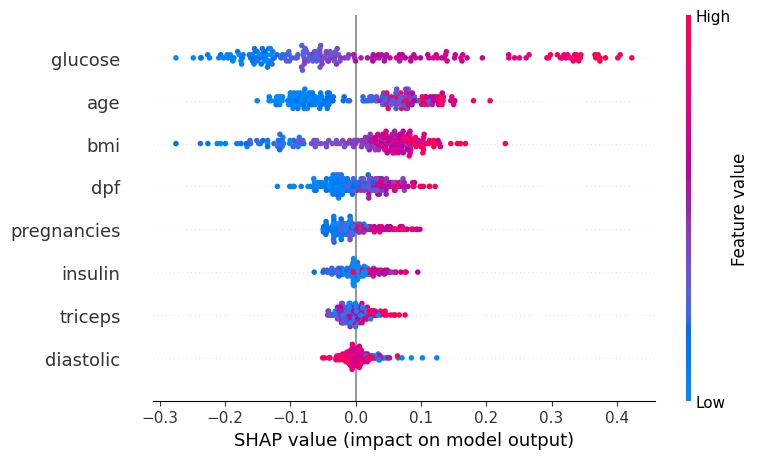

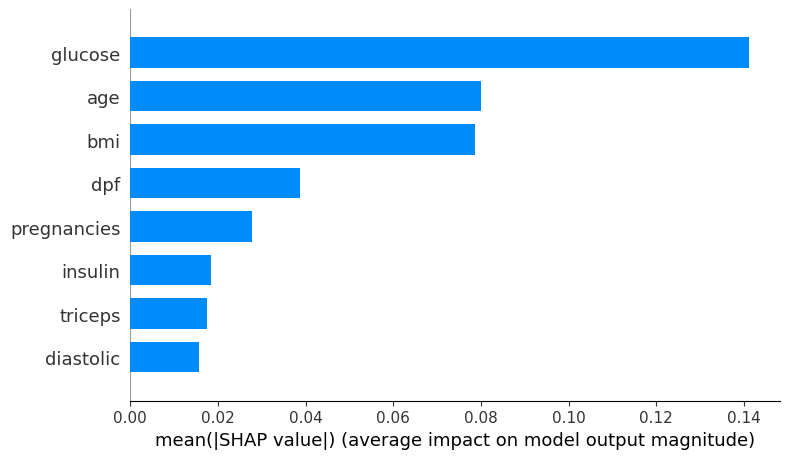

In [79]:
# Shap values
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Make plot. Index of [1] is explained in text below.
#shap.summary_plot(shap_values[1], X_test, plot_type="bar", color='red')

# Make plot. Index of [1] is explained in text below.
#shap.summary_plot(shap_values[1], X_test, plot_type="bar", color='red', show=False)
#plt.savefig('./assets/shap.png', bbox_inches='tight', dpi=300)

In [80]:
?shap_values

Type:        list
String form:
[array([[ 0.00607443,  0.14279835,  0.00398408, ..., -0.0600537 ,
           0.00412467, -0.1498223 <...>    [-0.00887584, -0.10236404,  0.00125514, ..., -0.1127406 ,
           -0.03247523, -0.04079849]])]
Length:      2
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.

#### A natural question to ask is, "If the glucose level increases, does the predicted probability for diabetes increase or decrease?". 
Or is there a more complicated connection between the two?

We can (partly) uncover this by using partial dependence plots.

## Partial dependence plots

The idea is to plot predictions while increasing a specified feature. For example, what happens to the predicted probability of diabetes as the glucose level increases? As this is an important feature, we expect it to change quite a bit (in fact, since we're talking about diabetes, we expect the probability to increase). And what about unimportant features like age? 

<img src="../assets/You.png" width="90"> Explain "partial dependence plots" to me

<img src="../assets/GPT-MedAI.png" width="300">

Partial Dependence Plots (PDPs) are a tool used in machine learning to show the relationship between a target response and a set of input features of interest, marginalizing over the values of all other features (i.e., averaging them out). These plots are valuable for interpreting complex machine learning models, especially in fields like medical AI, where understanding how different factors influence predictions is crucial.

### Understanding Partial Dependence Plots

1. **Basic Concept**: A partial dependence plot shows the average effect of one or two features on the predicted outcome of a machine learning model. This is done while keeping all other features constant, at least in a statistical sense.

2. **Marginalizing Other Features**: The 'partial' in partial dependence comes from the fact that the plot shows the dependence of the response on selected features, marginalizing over the values of all other features. This means it considers the average effect of the selected features across all possible values of the other features in the dataset.

3. **Visualization**: Typically, a PDP is a line chart for a single feature or a heat map for two features, showing how changes in these features affect the predicted outcome.

### Creating a Partial Dependence Plot

- **Single Feature**: For a single feature, the PDP will show the mean predicted response as that feature varies over its range.
- **Two Features**: For two features, the PDP will show how the predicted response changes as both features vary, often represented as a contour plot.

### Use in Medical AI

1. **Interpreting Model Outputs**: They help in understanding how certain features (like age, blood pressure, or dosage of a drug) affect the model’s predictions, which is vital for clinical decision-making and understanding disease risk factors.

2. **Model Transparency**: PDPs contribute to the transparency of complex models, like random forests or gradient boosting machines, where the relationship between input and output is not straightforward.

### Limitations

- **Assumption of Independence**: PDPs assume that the features are independent of each other, which is often not the case in real-world data. This can lead to misleading interpretations, especially when features are correlated.

- **Average Effect**: Since PDPs show the average effect of features, they may not capture the model’s behavior well in cases where the relationship between features and target is highly non-linear or complex.

### Implementing Partial Dependence Plots

In Python, PDPs can be implemented using libraries like `matplotlib` for plotting, along with `pandas` and `sklearn` for data manipulation and model training. The `sklearn.inspection` module also offers tools to generate partial dependence data.

### Example

Imagine a scenario where we use a PDP to understand the impact of blood glucose levels on the prediction of a diabetes risk model. The PDP will show how the risk prediction changes on average as blood glucose levels increase, while other factors (like age, weight, etc.) are averaged out.

In summary, Partial Dependence Plots are a useful interpretability tool, offering a visual representation of the average impact of selected features on the prediction of a machine learning model. While they are helpful for gaining insights into model behavior, it's important to be aware of their assumptions and limitations, especially when dealing with correlated features.

In [81]:
from sklearn.inspection import PartialDependenceDisplay

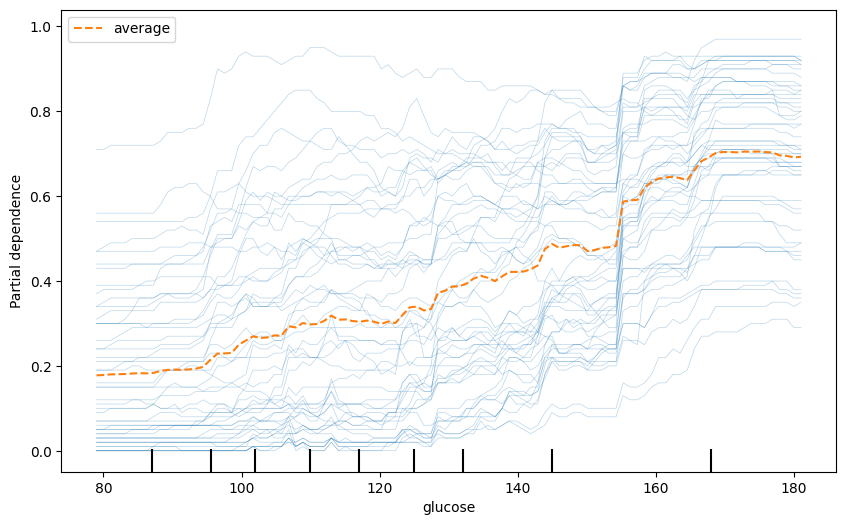

In [82]:
f, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['glucose'], kind='both', subsample=50,
                                       ax=ax)
plt.show()

We see that as the glucose level increases the predicted probability for diabetes increases. 

What about BMI?

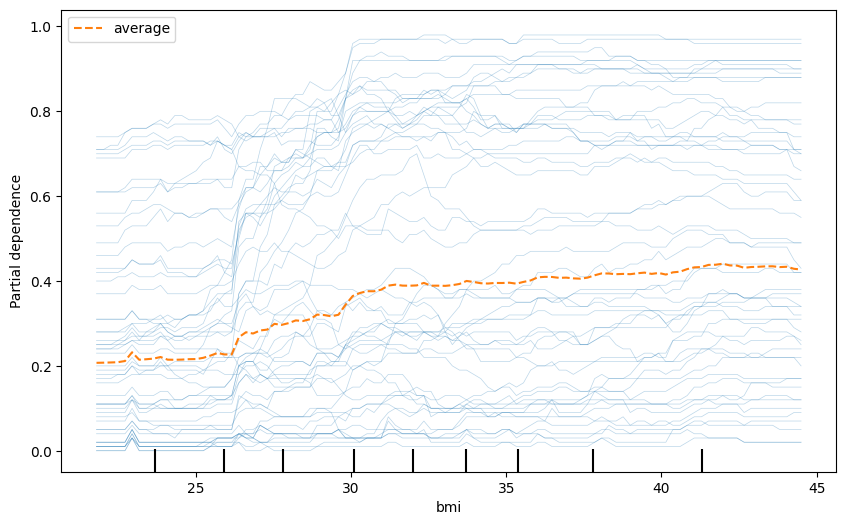

In [83]:
f, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['bmi'], kind='both', subsample=50,
                                       ax=ax)
plt.show()

Same for BMI. The plot for age indicates why this feature is deemed unimportant: the probability increases a bit at the beginning (low ages), but then it flattens out. 

What about age?

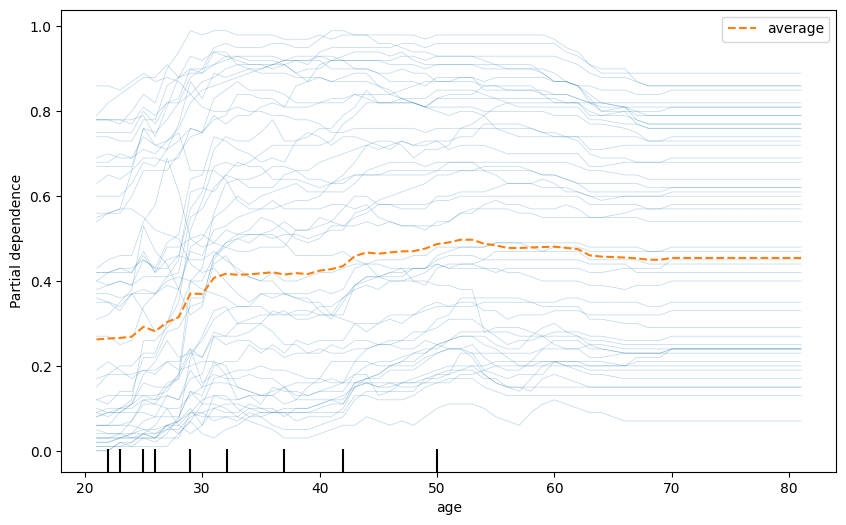

In [84]:
f, ax = plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['age'], kind='both',  subsample=50, 
                                       ax=ax)
plt.show()

### Two-dimensional PDP

Typically it's the interaction among several features that influences model predictions, not each feature independently. By plotting two-dimensional interaction plots, one can get a better understanding of how the features affect the predictions:

<img src="../assets/You.png" width="90"> Two-dimensional PDP

<img src="../assets/GPT-MedAI.png" width="300">

Two-dimensional Partial Dependence Plots (2D PDPs) extend the concept of standard partial dependence plots by visualizing the interaction between two features and their joint effect on the predicted outcome of a machine learning model. They are particularly useful when you suspect or want to explore how the interaction between two features influences the model's predictions.

### Understanding Two-Dimensional PDPs

1. **Joint Feature Interaction**: While a standard PDP shows the effect of a single feature, a 2D PDP illustrates how two features together influence the prediction. This can reveal more complex relationships and interactions that wouldn't be visible when examining each feature in isolation.

2. **Visualization**: Typically, 2D PDPs are represented as contour plots or heat maps. The x-axis and y-axis represent the two features of interest, and the color or contour levels represent the average predicted outcomes.

3. **Marginalizing Over Other Features**: Similar to the one-dimensional PDP, a 2D PDP averages out the effects of all other features in the model. This means it shows the average predicted effect over the dataset for combinations of the two features being plotted.

### Application in Medical AI

In a medical context, a 2D PDP can be instrumental in understanding how two clinical variables interact and affect a patient's risk or prognosis. For example:
- **Interaction Between Age and Blood Pressure**: A 2D PDP could reveal how the combination of age and blood pressure affects the risk prediction for a cardiovascular event.
- **Drug Dosage and Patient Weight**: It might illustrate how the interaction between drug dosage and patient weight influences the effectiveness of a treatment.

### Creating a Two-Dimensional PDP

In Python, you can create 2D PDPs using libraries like `matplotlib` for plotting and `sklearn` for model-related functions. The `plot_partial_dependence` function in `sklearn.inspection` can be used, specifying the two features of interest.

### Example Code

Here's a simplified example of how you might create a 2D PDP in Python:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_features=5, random_state=42)
model = RandomForestClassifier().fit(X, y)

# Create the 2D partial dependence plot
features = [0, 1]  # indices of the features you're interested in
plot_partial_dependence(model, X, [features], grid_resolution=20)
plt.show()
```

In this code, `features = [0, 1]` indicates that we're looking at the interaction between the first and second features of the dataset.

### Interpretation and Limitations

- **Interpretation**: The plot should be interpreted as showing the average predicted effect on the response variable when varying the two features, keeping others constant.

- **Correlation Caution**: If the two features are highly correlated, the interpretation becomes more complex and potentially less reliable.

- **Complex Relationships**: 2D PDPs can reveal complex interactions, but they still average over other features and might not capture all nuances.

In summary, two-dimensional partial dependence plots are a valuable tool for exploring the interactions between pairs of features in a machine learning model, offering deeper insights into the model's behavior, especially in fields like medical AI where understanding these interactions can be crucial.


In [85]:
print(sklearn.__version__)

1.2.2


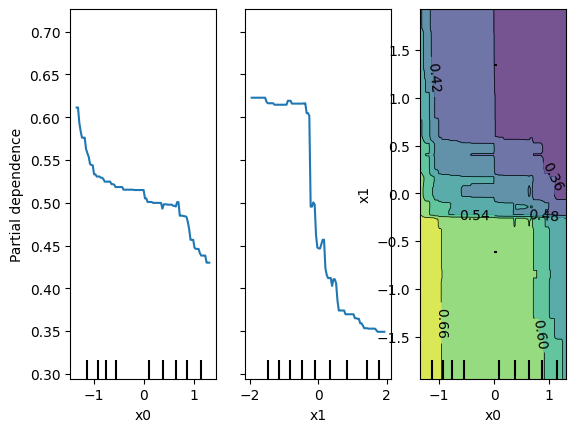

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_features=5, random_state=42)
model = RandomForestClassifier().fit(X, y)

# Create the 2D partial dependence plot
features = [0, 1, (0, 1)]
#features = [0, 1]  # indices of the features you're interested in
PartialDependenceDisplay.from_estimator(model, X, features)
#plot_partial_dependence(model, X, [features], grid_resolution=20)
plt.show()

... back to our case study:

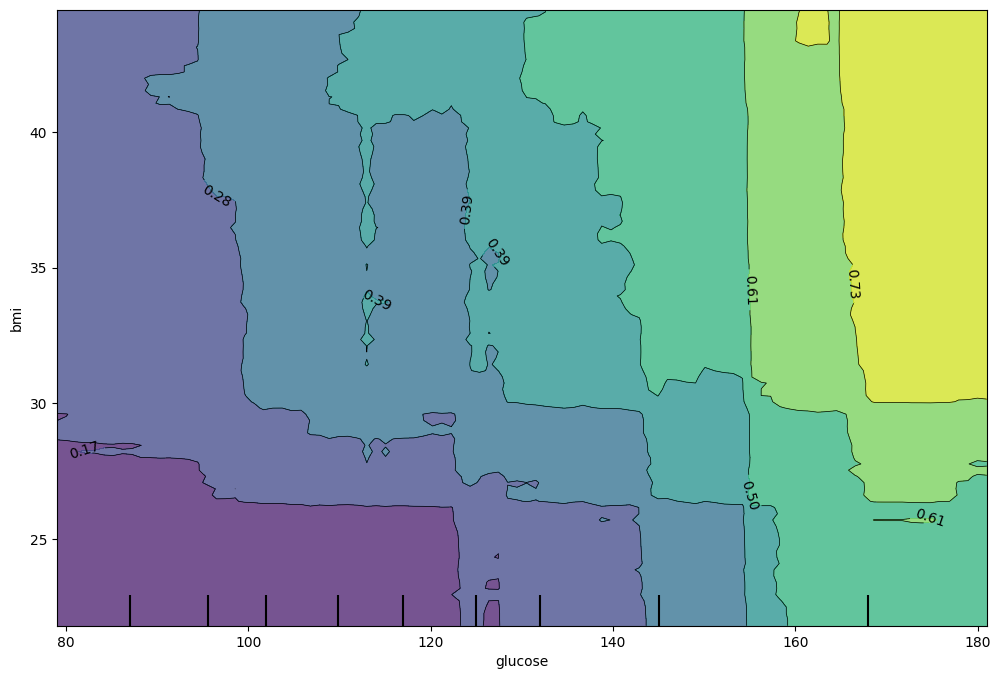

In [87]:
f, ax = plt.subplots(figsize=(12,8))
PartialDependenceDisplay.from_estimator(rf, X_train, [('glucose', 'bmi')], kind='average',  subsample=50, 
                                        ax=ax)
plt.show()

We'll learn about other methods to investigate and explain machine learning model predictions later in the course.

> **NOTE:** Of course, all these conclusions depend on the exact data set that we have used. To make any realistic inferences about diabetes and its relation to glucose level, BMI, age etc one would need a much more carefully designed data set and more carefully designed investigations of models and their predictions. 

# Exercises

> **Your turn!**
- Get the feature importances for the Iris predictions. Is it sepal length or width that provides the most information?
- Construct another random forest by changing the `random_state`. What happens to the accuracy? What happens to the feature imporances?
- Try to create a better random forest by tuning the parameters. If you want to dive deep, use `grid_search` (http://scikit-learn.org/stable/modules/grid_search.html) to automatically find good parameters. 
- Try another classification model. 
- **Extra challenge**: Here's another well-prepared data set: https://assets.datacamp.com/production/course_1939/datasets/auto.csv. Download it and repeat the procedure above. This time the goal is to predict the country of origin of a car given various features. 
